                  PERFORMING EDA ON CUSTOMER CHURN DATA FOR TELECOM INDUSTRY.

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


LOADING THE RAW DATA IN PANDAS DATAFRAME

In [2]:
df = pd.read_csv("../telecom_churn.csv")

READING THE TOP 5 ROWS OF DATA TO GET SOME INTUATION ABOUT DATA.

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


NOW CHECKING HOW MANY NUMBER OF COLUMNS WE GOT.

In [4]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [5]:
df.shape

(3333, 11)

AS WE CAN SEE WE HAVE 11 COLUMNS AND 3333 EXAMPLES NOW CHECKING THE DATA TYPES OF ALL COLUMNS

In [6]:
df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

CHECKING THE NO OF UNIQUE VALUES IN EACH COLUMN

In [7]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


NOW CHECKING THE STATISTICS OF THE DATA

In [9]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


WHAT ACTUALLY EACH COLUMN IS REPRESENTING 🤔🤔.

1. Churn → Whether the customer has left the service or not (0 = active, 1 = churned)

2. AccountWeeks → Number of weeks the customer’s account has been active

3. ContractRenewal → Whether the customer has renewed their contract (0 = no, 1 = yes)

4. DataPlan → Whether the customer has a data plan (0 = no plan, 1 = plan active)

5. DataUsage → Amount of data used by the customer in GB

6. CustServCalls → Number of times the customer called customer service

7. DayMins → Total minutes of calls made during the day

8. DayCalls → Total number of calls made during the day

9. MonthlyCharge → Monthly bill amount (in dollars or local currency)

11. OverageFee → Extra charges if usage exceeds the plan (in same currency)

RoamMins → Total minutes spent on roaming calls

NOW I GONNA PLOT SOME GRAPHS TO CHECK THE REALTIONS BETWEEN FETURES.

NOTE - OUR TARGET IS TO CLASSIFY THAT EITHER CUSTOMER WILL STAY OF STOP THE SERVICES WITH US SO THE CATEGORICAL COLUMN CHURN IS OUR TARGET PROBLEM THAT EITHER THE CUSTOMER WILL STAY OR STOP THE SERVICES WITH US.

NUM_COLUMNS = numerical_columns = ["AccountWeeks","DataUsage","CustServCalls","DayMins","DayCalls","MonthlyCharge","OverageFee","RoamMins"]

CATEGORICAL_COLUMNS = categorical_columns = ["ContractRenewal","DataPlan"]

TARGET_COLUMN = 'CHURN'

FIRST WE CAN CHECK COUNT FOR THE CHURN OR NOT I GONNA USE COUNTPLOT FOR IT TO SEE WHETHER THE DATA IS SKEWED OR WHETHER THERE IS SOME KIND OF INBALANCE.

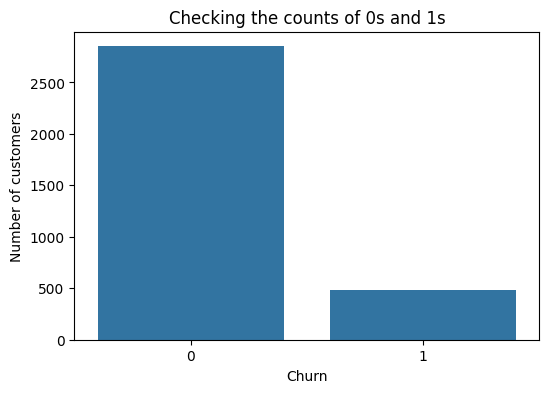

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df)

plt.title("Checking the counts of 0s and 1s")
plt.xlabel("Churn")
plt.ylabel("Number of customers")

plt.show()

As we can see in our data customers with churn=0 means who are still using serivces are higher as compared to customers who gonna churn.We can also plot pie chart to check the percentages.

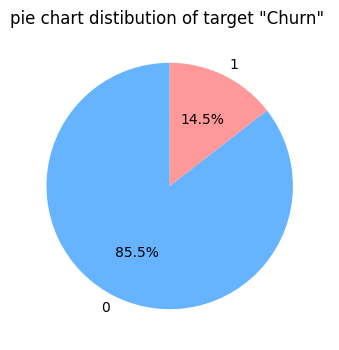

In [11]:
counts = df['Churn'].value_counts()
plt.figure(figsize=(6,4))

plt.pie(counts, labels=counts.index, autopct='%1.1f%%',startangle=90,colors = ['#66b3ff','#ff9999'])
plt.title("pie chart distibution of target \"Churn\" ")
plt.show()

FROM THE PIE DISTRIBUTION WE CAN CONCLUDE THAT 85.5 PERCENT OF PEOPLE STILL USING OUR SERVICES AND 14.5 CHURNED.NOW WE GONNA LOOK AT RELATION BETWEEN THE COLUMNS AND WHICH FEATURE AFFECT THE CHURN.FIRST OF ALL WE CAN CHECK WITH CONTRACTRENEWAL.

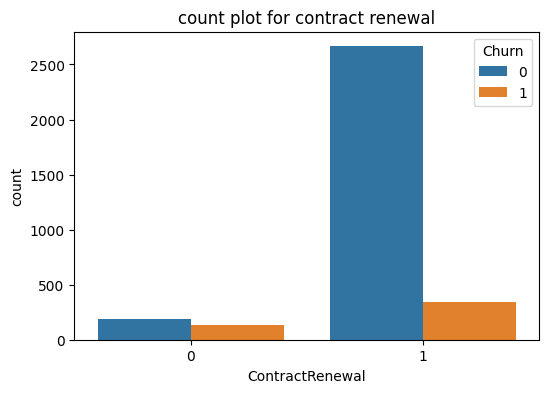

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="ContractRenewal", hue='Churn',data=df)

plt.title("count plot for contract renewal")
plt.show()

AS WE CAN SEE IF THE CONTRACT RENEWAL = 0 MEANS NO THEN THE CHURN AND NON CHURN WILL BE ALMOST SIMILAR WE CAN CONSIDER AND IF RENEWAL IS = 1 YES THEN NON CHURN PROBABLITY IS MUCH HIGHER WE CAN SEE HERE.

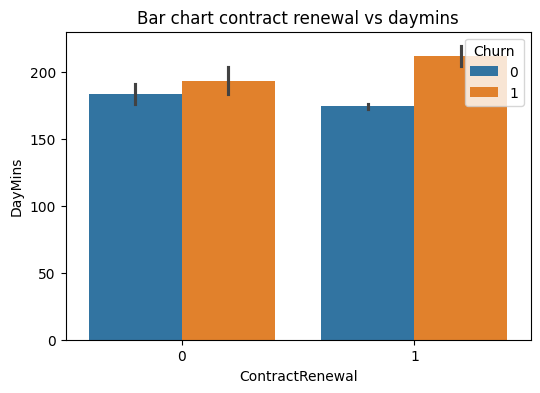

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='ContractRenewal', y='DayMins',hue='Churn', data=df, estimator=np.mean)

plt.title("Bar chart contract renewal vs daymins")
plt.show()


CONCLUSION OF THE ABOVE BARPLOT CONTRACTRENEWAL AS X AXIS WHICH IS CATEGORICAL AND DAYMINS IS NUMERICAL COLUMN AND HUE SELECTED AS CHURN WE CAN CNCLUDE THAT FOR THE CONTRACT RENEWAL=1 YES SO BASICALLY THE CUSTOMERS YOU HAS RENEWED PLAN BUT ALSO CHURN = 1 MEANS WHO LEFT HAS GOT MORE DAYMINS WHILE THE ONE WHO STAYED GOT LOWER DAYMIN .BUT THERE IS MINUTE DIFFRENCE FOR CONTRACT RENEWAL = FALSE AND CHURN = 0.

WE CAN CREATE A FUNCTION TO GET THE PERCENTAGES OF CHURN WRT THE CATEGORICAL COLUMN THAT WE ARE USING.WE HAVE SEEN FOR CONTRACTRENEWAL NOW OTHER IMPORTANT COLUMN IS DATAPLAN.SO BASICALLY BIGGER THE GAP BETWEEN CHURN THE STRONGER THE FEATURE.

In [14]:
col='ContractRenewal'

churn_pct = (
    pd.crosstab(df[col], df['Churn'], normalize='index') * 100
).round(2)

print(churn_pct)

Churn                0      1
ContractRenewal              
0                57.59  42.41
1                88.50  11.50


AS WE CAN SEE WHEN THE CONTRACTRENEWAL IS TRUE THEN THERE IS HUGE DIFFRENCE IN CHURN SO IT IS IMPORTANT FEATURE FOR OUR DATA.NOW ANOTHER CATEGORICAL FEATURE NAMED DATA PLAN.

In [15]:
def categorical_eda(df, col, target='Churn'):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1️⃣ Countplot (distribution)
    sns.countplot(x=col, data=df, ax=axes[0, 0])
    axes[0, 0].set_title(f'{col} Distribution')

    # 2️⃣ Pie chart (percentage)
    counts = df[col].value_counts()
    axes[0, 1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90
    )
    axes[0, 1].set_title(f'{col} Percentage Distribution')

    # 3️⃣ Countplot with hue (Churn relation)
    sns.countplot(x=col, hue=target, data=df, ax=axes[1, 0])
    axes[1, 0].set_title(f'{col} vs {target}')

    # 4️⃣ Turn off last axis (table ke liye)
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

    # 4️⃣ Churn percentage table
    churn_pct = (
        pd.crosstab(df[col], df[target], normalize='index')[1] * 100
    ).round(2)

    print(f'\nChurn Percentage by {col}')
    display(churn_pct)


In [22]:
def numerical_eda(df, col, target='Churn'):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # 1️⃣ Boxplot (summary + outliers)
    sns.boxplot(x=target, y=col, data=df, ax=axes[0, 0])
    axes[0, 0].set_title(f'Boxplot: {col} vs {target}')

    # 2️⃣ Violin plot (distribution shape)
    sns.violinplot(x=target, y=col, data=df, ax=axes[0, 1],inner='box')
    axes[0, 1].set_title(f'Violin Plot: {col} vs {target}')

    # 3️⃣ Mean barplot
    sns.barplot(x=target, y=col, data=df, estimator=np.mean, ax=axes[1, 0])
    axes[1, 0].set_title(f'Mean {col} vs {target}')

    # 4️⃣ Binning + churn %
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')
    churn_pct = (
        pd.crosstab(df[f'{col}_bin'], df[target], normalize='index')[1] * 100
    ).round(2)

    axes[1, 1].axis('off')
    axes[1, 1].text(
        0.1, 0.5,
        churn_pct.to_string(),
        fontsize=11,
        family='monospace'
    )
    axes[1, 1].set_title('Churn % by Bins')

    plt.tight_layout()
    plt.show()


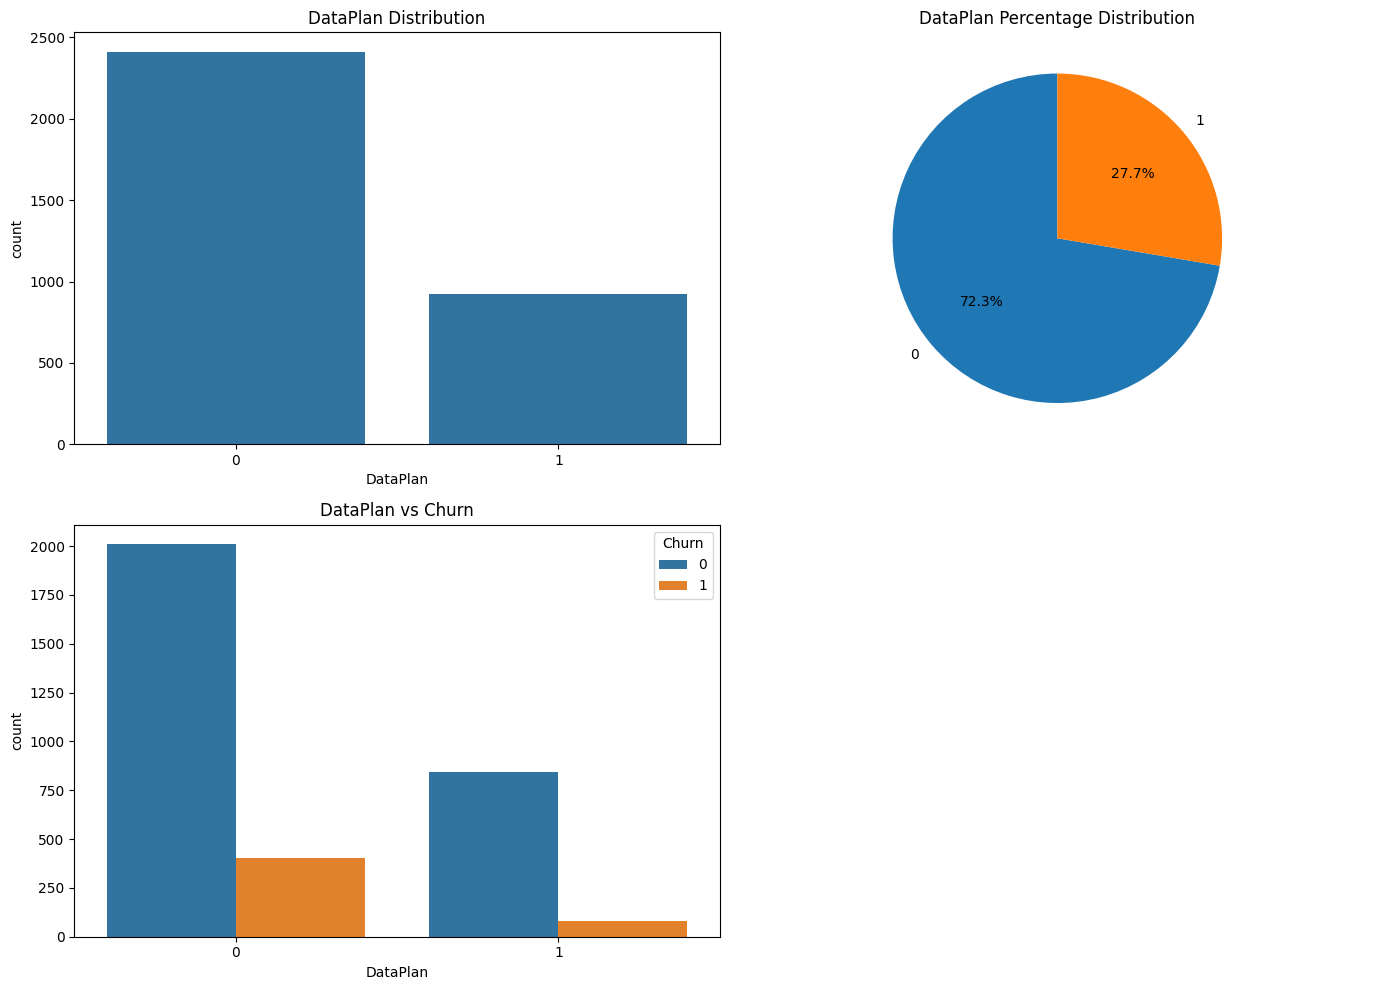


Churn Percentage by DataPlan


DataPlan
0    16.72
1     8.68
Name: 1, dtype: float64

In [17]:
categorical_eda(df,'DataPlan',target='Churn')

TO MAKE THE CODE MORE ROBUST I HAVE MADE TWO FUNCTION TO FIRST OF UNDERSTAND THE BASIC DISTRIBUTION OF THE DATA catefgorical_eda and numerical_eda WE HAVE SEEN DISTRIBUTION OF CONTRACT RENEWAL AND DATAPLAN.

In [18]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

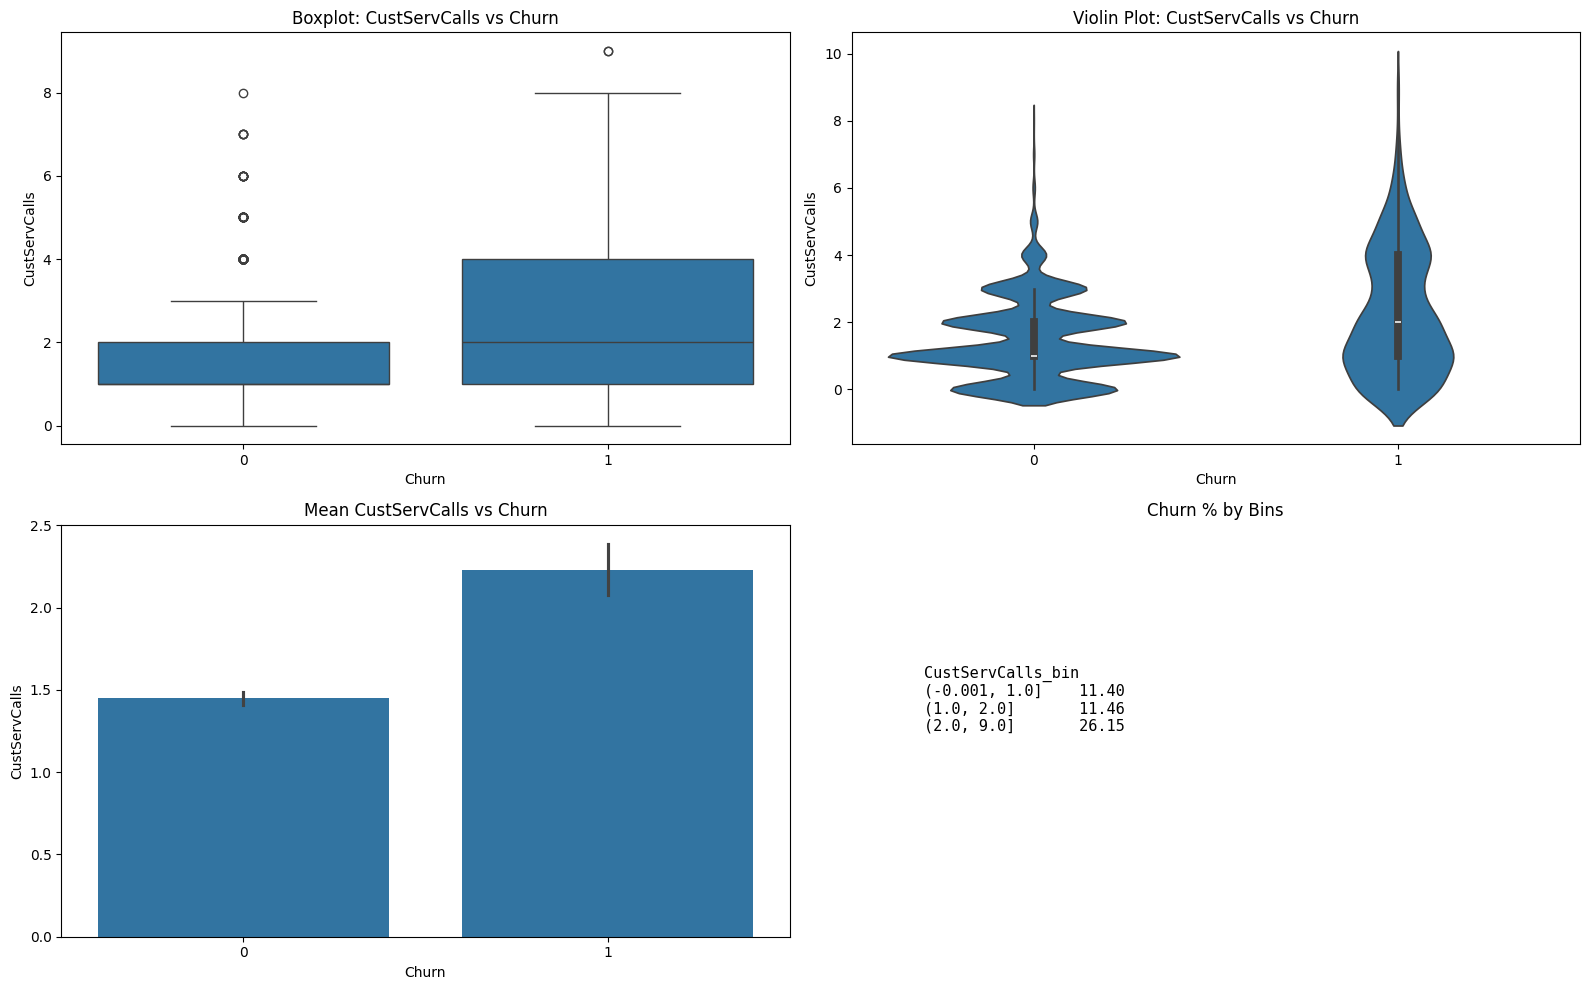

In [24]:
numerical_eda(df,col='CustServCalls',target='Churn')

AS WE CAN SEE THE CUSTOMER WHO HAS AVG CALL (2,9.9.0] HAS 26.15 OF CHURNING WHICH IS MORE AS COMPARED TO OTHER BINS. AND FROM VIOLIN AND BOX PLOT WE CAN SAY THAT LET JUST TALK ABOUT PEOPLE WHO CHURNED ACTUALLY.MEDIAN VALUE OF CHURNED IS AROUND ~ 2 FOR CHURNED IT IS AROUND ~ 1 . FOR CHURNED CUSTOMERS MORE MEDIAN MEANS COMPARITIVERY MORE NO OF CALLS WE CAN EVEN SEE IN BOX HIGHT IS MORE FORM MEDIAN TO Q3 QUARTILE. THAT MEANS USUALLY THE CUSTOMERS WHO CHURNED HAS HGIHER NO OF CUSTOMER SERVICE CALLS.

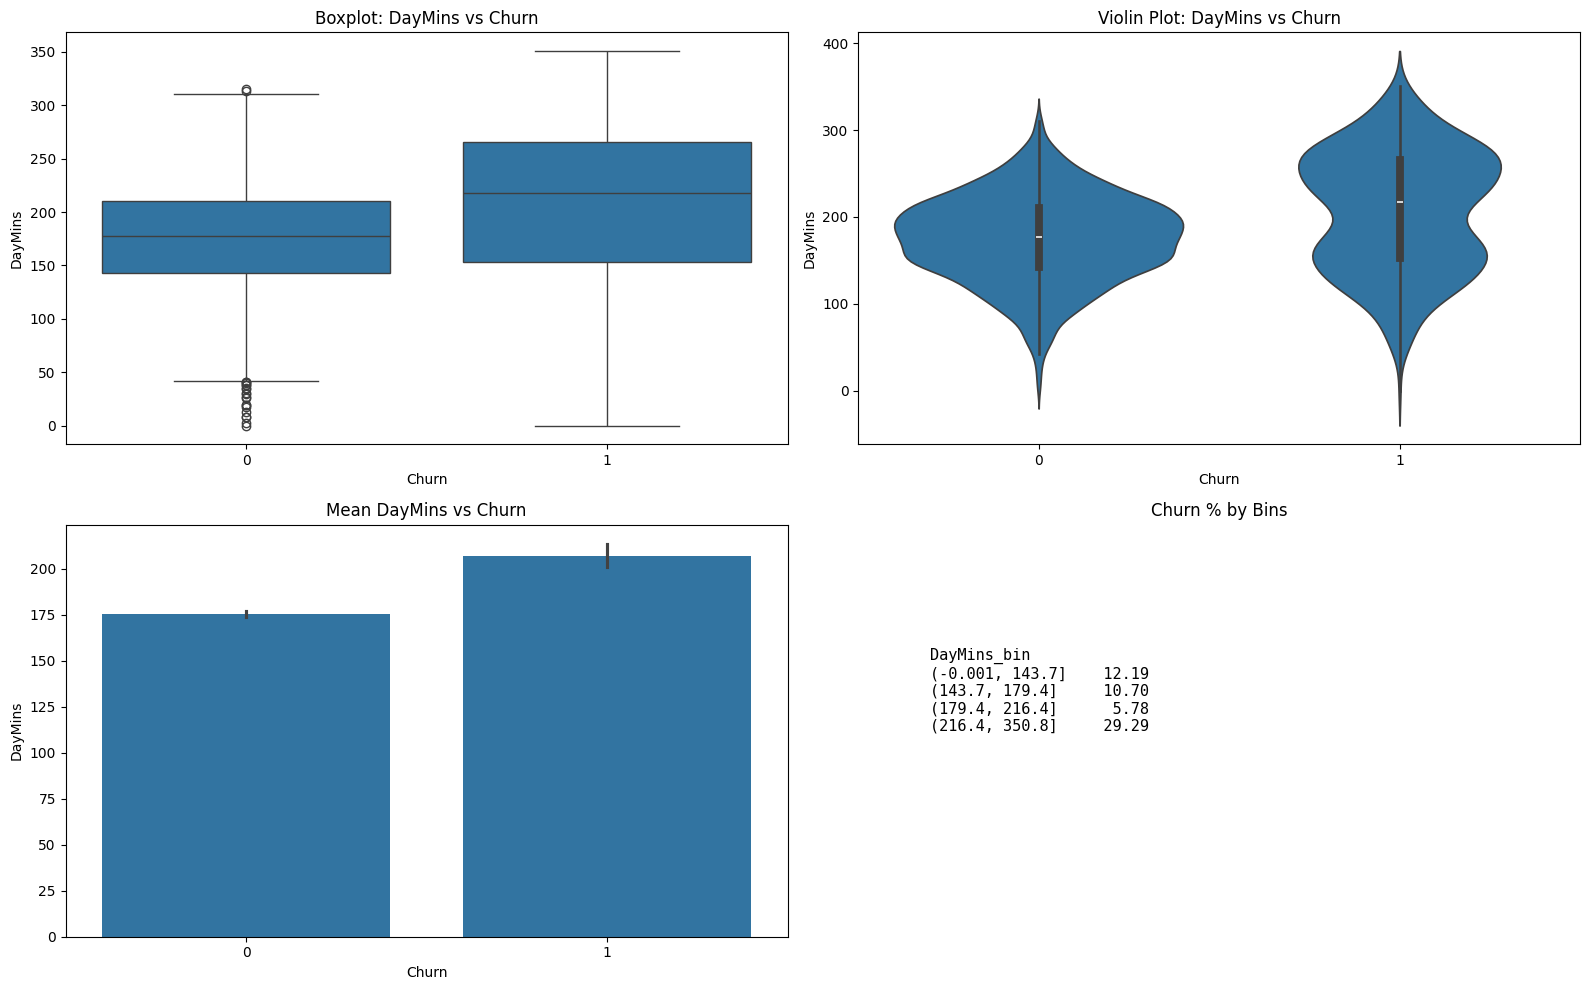

In [23]:
numerical_eda(df,col='DayMins',target='Churn')

FROM THE ABOVE PLOTS WE CAN CONCLUDE THAT FOR CHURNED CUSTOMER MEDIAN IS QUITE HIGHER MOST OF THE PEOPLE FOR CHURNED ARE DISTIBUTED IN Q1-Q2 25%-50% AND ALSO FOR NON CHURNED CUSTOMERS DATA IS MORE DENSILY DISTRIBUTED AROUND THE MEDIAN AND CHURN % AS COMPARED TO BINS WE CAN CONCLUDE THE MOST CHURNED CUSTOMERS HAS GOT MORE DAYMINS.

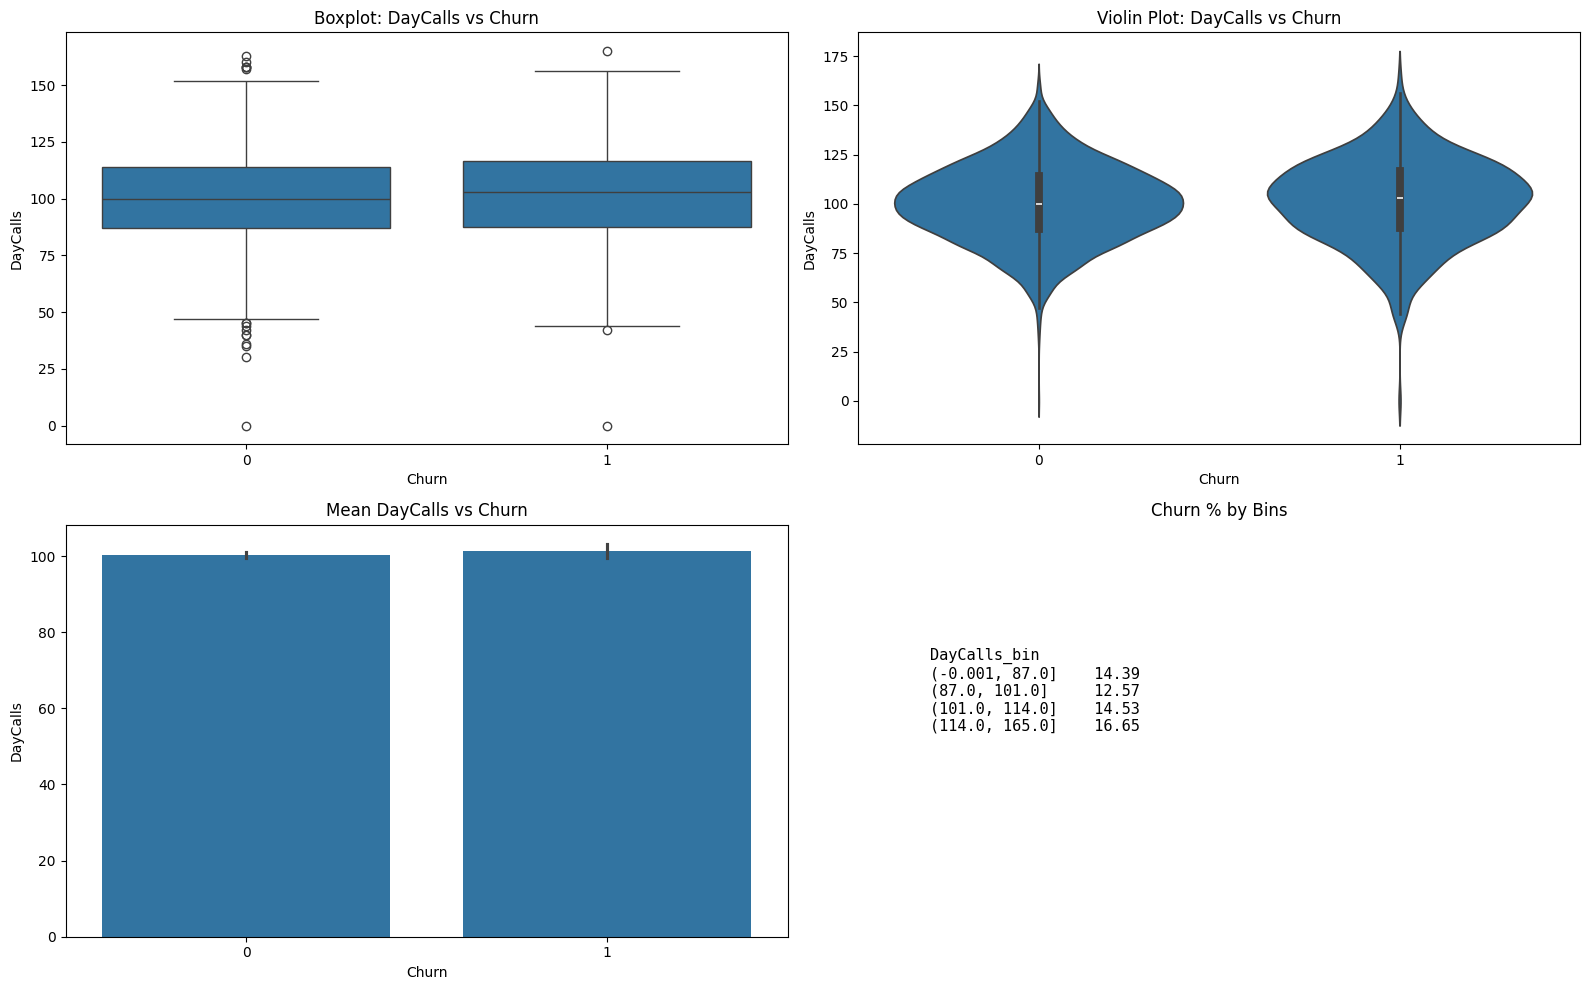

In [26]:
numerical_eda(df,col='DayCalls',target='Churn')

AS OF NOW WE CAN SEE THIS FEATURE IS NOT TELLING US SO MUCH ALL THE DISTRIBUTION AND SPREAD IS ALMOST SIMILAR WE'LL SEE IF WE CAN COMBINE IT WITH OTHER OR GET SOME USEFULL INSIGHT.

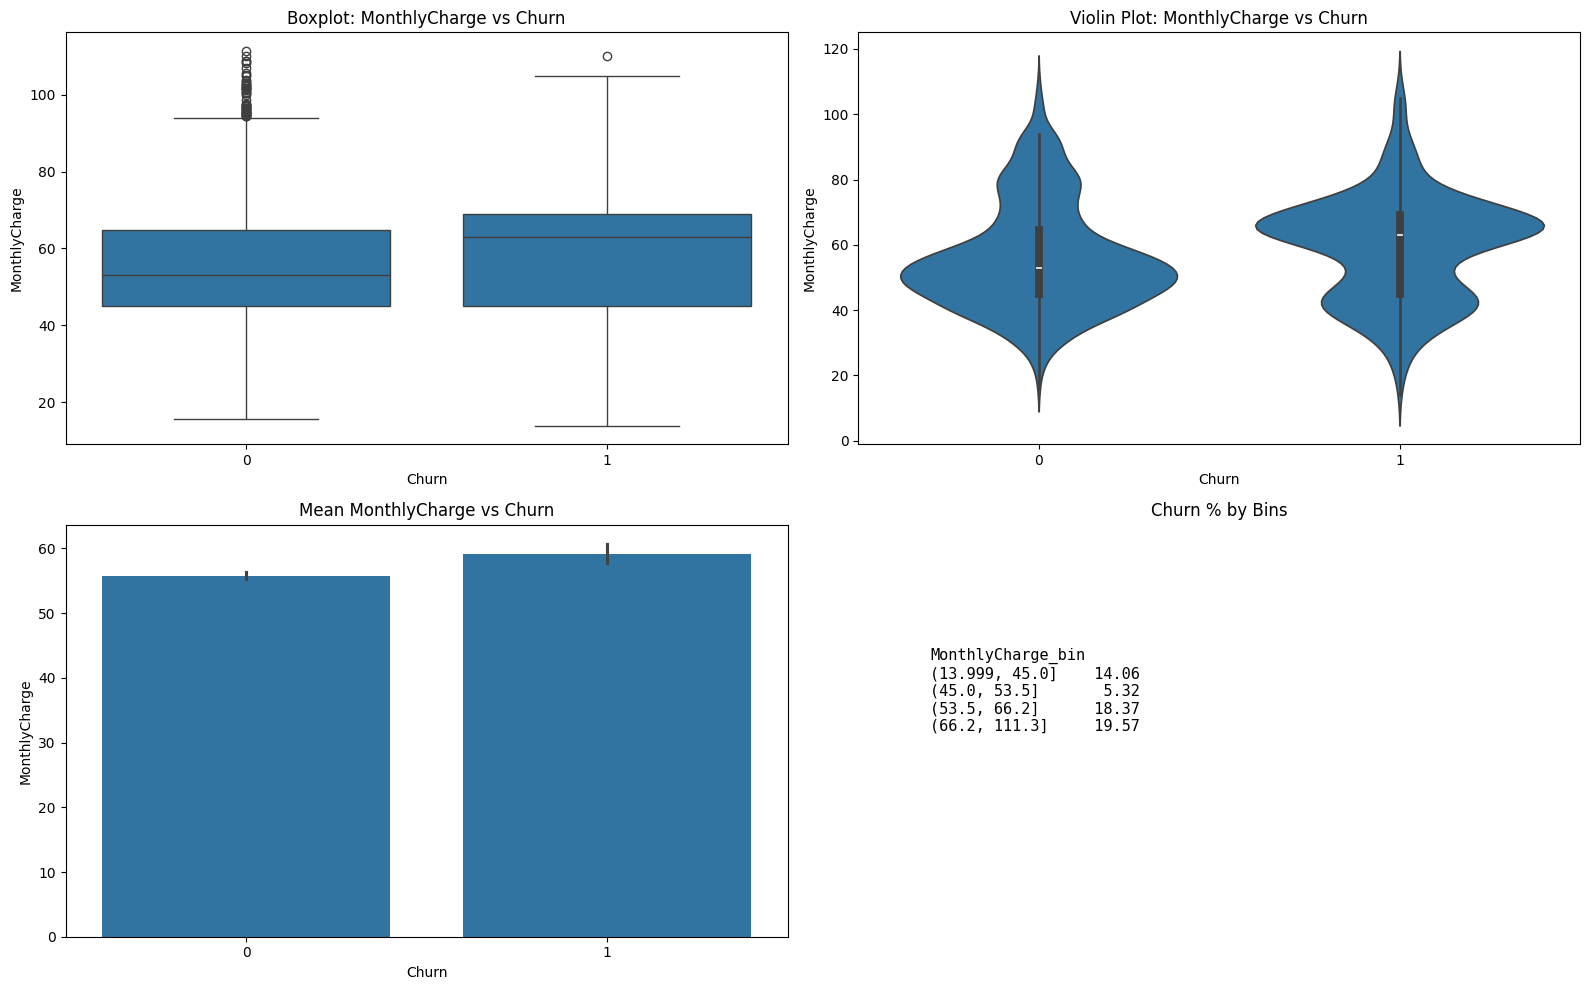

In [27]:
numerical_eda(df,col='MonthlyCharge',target='Churn')

“The bar plot shows only a minor difference in mean monthly charges between churned and non-churned customers. However, the box and violin plots reveal differences in distribution patterns. Non-churned customers exhibit greater variability in the upper half of the distribution (median to Q3), indicating stable retention even at higher charges. In contrast, churned customers show higher variability between Q1 and the median, suggesting inconsistency in lower to mid-range charges. Additionally, the median monthly charge for churned customers is slightly higher than for non-churned customers. Despite these differences, both groups show high density around the median and significant overlap, indicating that monthly charge alone is a weak predictor of churn.”

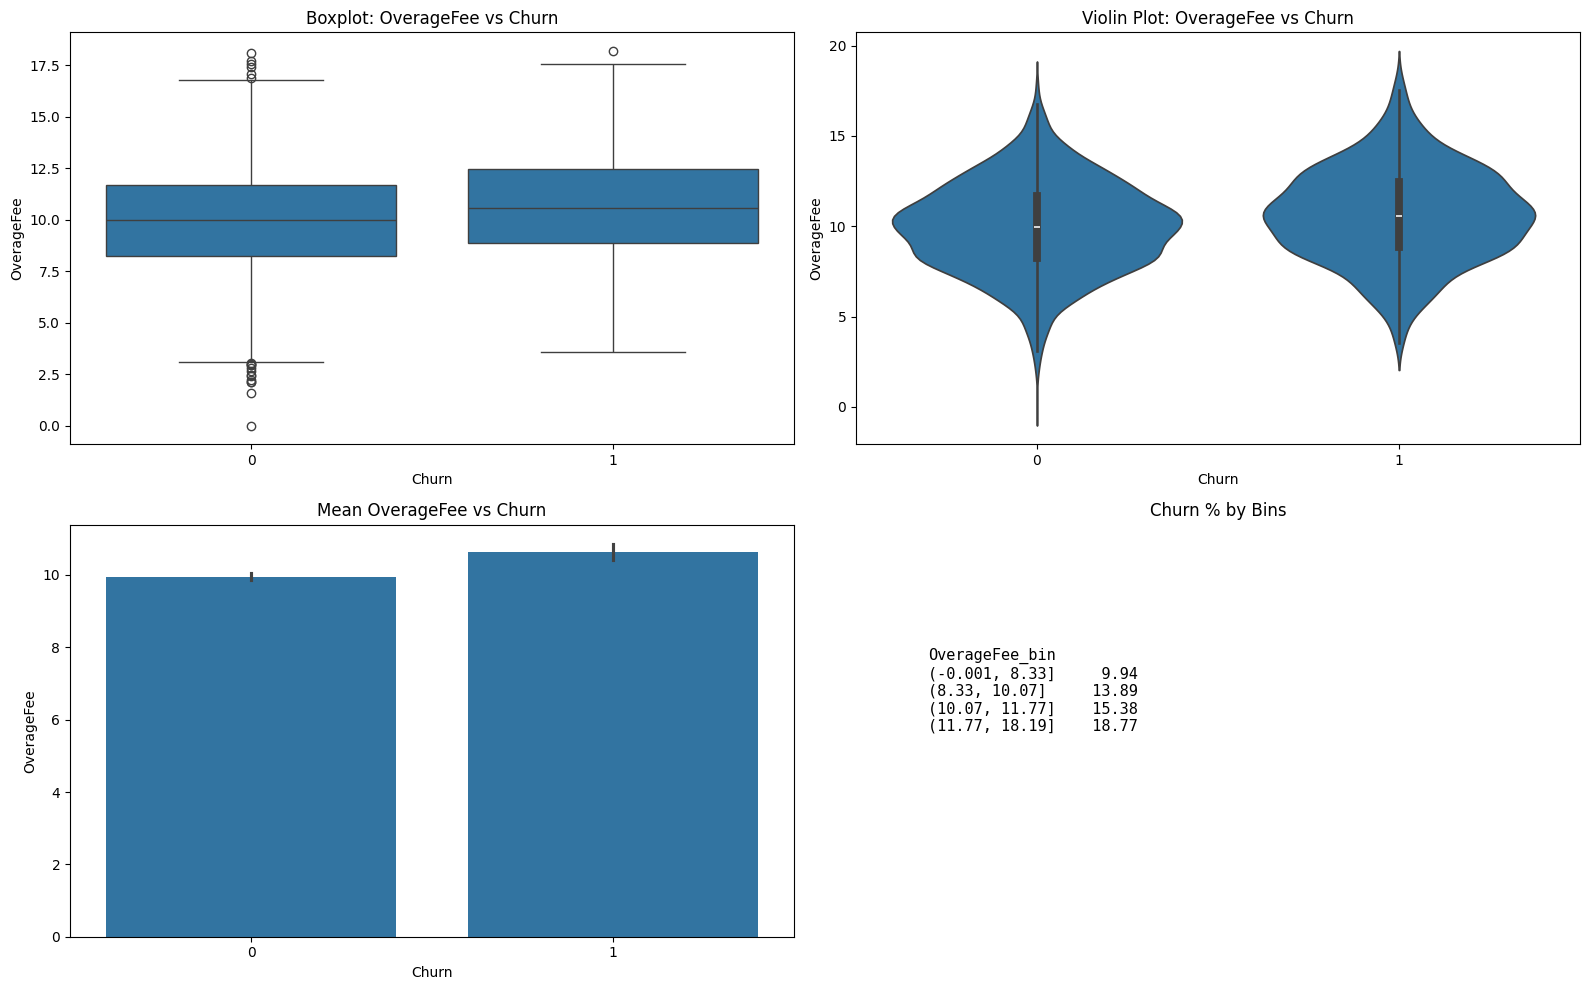

In [32]:
numerical_eda(df,col='OverageFee',target='Churn')

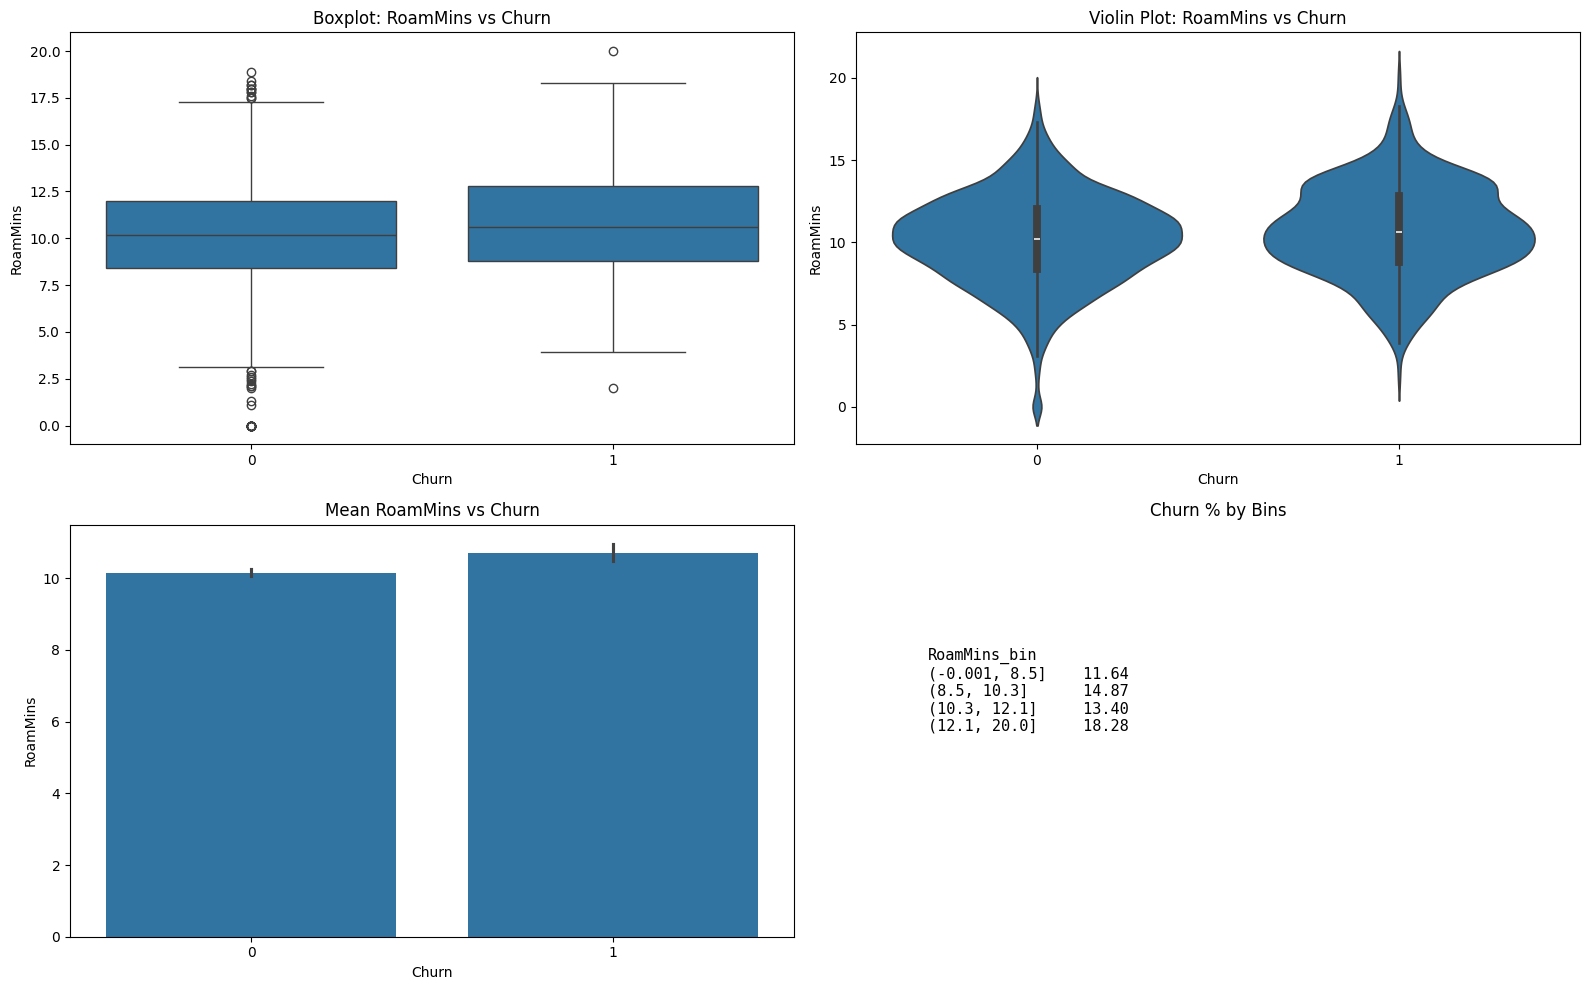

In [33]:
numerical_eda(df,col='RoamMins',target='Churn')

“I am not comparing overage fee with roaming minutes directly. Instead, I am evaluating each feature independently against the churn variable. For both overage fee and roaming minutes, the distributions for churned and non-churned customers are highly overlapping, with similar medians, comparable spreads, and no strong skewness differences. The mean values also show only minor variation. As a result, these features do not provide strong univariate signals for churn prediction. In contrast, renewal-related features show clear separation between churned and non-churned customers, indicating much higher predictive importance.”